## GMM

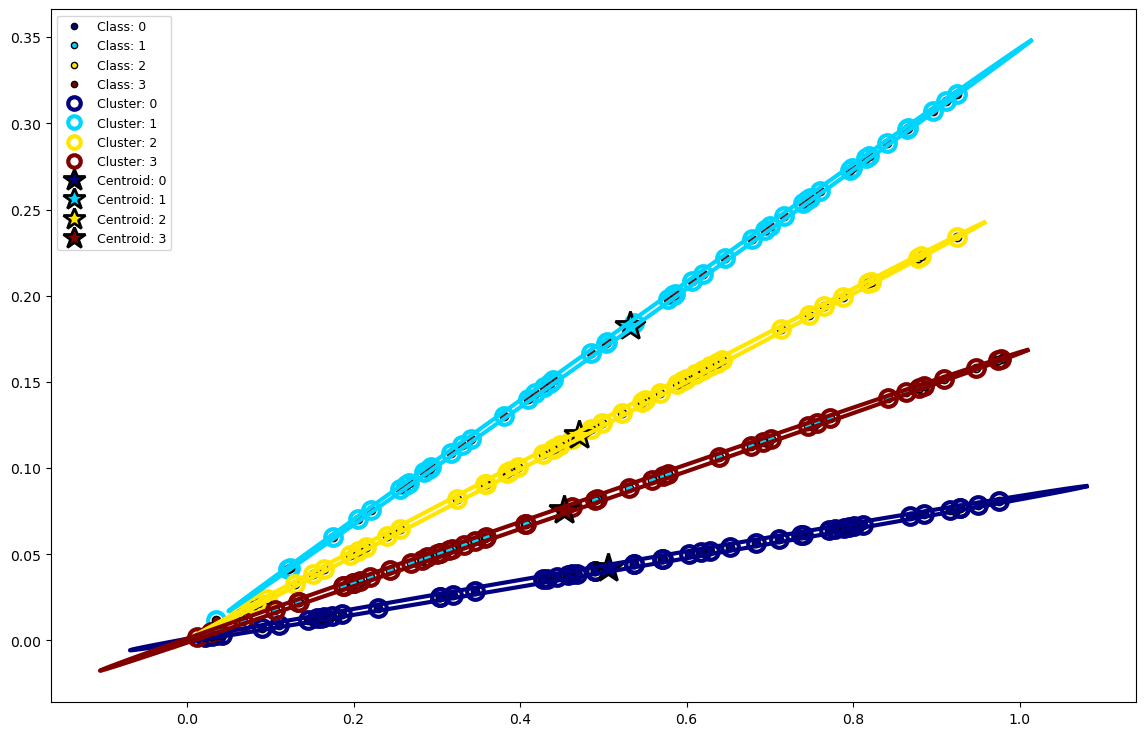

Ran Exercise 11.1.1


In [1]:
# exercise 11.1.1
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth2.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
# X_old = X
# X = np.hstack([X,X])
N, M = X.shape
C = len(classNames)
# Number of clusters
K = 4
cov_type = "full"  # e.g. 'full' or 'diag'

# define the initialization procedure (initial value of means)
initialization_method = "random"  #  'random' or 'kmeans'
# random signifies random initiation, kmeans means we run a K-means and use the
# result as the starting point. K-means might converge faster/better than
# random, but might also cause the algorithm to be stuck in a poor local minimum

# type of covariance, you can try out 'diag' as well
reps = 1
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(
    n_components=K,
    covariance_type=cov_type,
    n_init=reps,
    tol=1e-6,
    reg_covar=1e-6,
    init_params=initialization_method,
).fit(X)
cls = gmm.predict(X)
# extract cluster labels
cds = gmm.means_
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == "diag":
    new_covs = np.zeros([K, M, M])

    count = 0
    for elem in covs:
        temp_m = np.zeros([M, M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
plt.figure(figsize=(14, 9))
clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
plt.show()

## In case the number of features != 2, then a subset of features most be plotted instead.
# figure(figsize=(14,9))
# idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
# clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])
# show()

print("Ran Exercise 11.1.1")

### Why does increasing n_init help?

The clustering result can be sensitive to the initial placement of centroids because the algorithm may converge to a local optimum rather than the global optimum. By running the algorithm multiple times with different initializations (e.g., n_init=10), you increase the likelihood of finding a better (or global) optimum. This addresses the problem of inconsistent models for the same value of K due to different initializations.


Explores more possibilities: Multiple initializations allow the algorithm to explore different starting configurations, reducing the chance of getting stuck in a suboptimal solution.
Improves stability: By selecting the best result from multiple runs, the final model is more likely to be consistent and robust across runs.
Mitigates randomness: Random initialization introduces variability; increasing n_init mitigates this by giving the algorithm more chances to find a good solution.

### Covariance type parameter
In Gaussian Mixture Models (GMMs), the covariance_type parameter determines the structure of the covariance matrices for each Gaussian component. Setting covariance_type='diagonal' restricts the covariance matrix to be diagonal, meaning:

Only the variances (diagonal elements) are estimated, and the covariances (off-diagonal elements) are set to zero.
This assumes that the features are uncorrelated within each cluster, and each feature has its own variance.
How does this affect the generated clusters?

Cluster shape: The clusters are constrained to have axis-aligned ellipsoidal shapes (since the covariance matrix is diagonal, the Gaussian components cannot model correlations between features). This contrasts with covariance_type='full', where clusters can have arbitrary ellipsoidal shapes that account for feature correlations.
Simpler model: The diagonal covariance matrix has fewer parameters to estimate (only the variances for each feature, not the full covariance matrix), which can lead to faster computation and less risk of overfitting, especially with limited data.
Potentially less flexibility: Clusters may not capture complex relationships between features, which could lead to poorer fit if the data has significant feature correlations.

### Case when clustering by the Gaussian mixture model or is it possible that points are assigned a cluster that is further away than other clusters in terms of Euclidean distance?
Yes, it is possible for a point to be assigned to a cluster whose mean is further away in terms of Euclidean distance compared to another cluster's mean. This happens because GMMs consider the entire Gaussian distribution, not just the distance to the mean. For example:

If a cluster has a large variance or a specific covariance structure (e.g., elongated shape), a point may have a higher probability of belonging to that cluster even if its mean is further away.
Clusters with different weights or densities can also affect assignments. A point might be assigned to a less dense cluster (with a larger spread) that is further away if the probability is higher due to the covariance or cluster weight.
For instance, consider two clusters: one with a tight, spherical covariance and another with a broad, elliptical covariance. A point may be closer to the tight cluster’s mean in Euclidean terms but have a higher probability of belonging to the broader cluster due to its covariance structure.

### Can the scaling of the variables seriously affect the results we get when clustering by the GMM or is the model able to take the scaling of the data into account?
the model relies on the covariance matrix and the distances between points and cluster means, which are influenced by the units and ranges of the variables.

![aic](images/aicbic.png)

As a result, BIC imposes a stronger penalty for adding parameters, especially when the sample size n is large, making it more likely to favor simpler models compared to AIC.

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3


/home/monkescripts/anaconda3/envs/dtu-ml/lib/python3.11/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Fitting model for K=4
Fitting model for K=5


/home/monkescripts/anaconda3/envs/dtu-ml/lib/python3.11/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Fitting model for K=6


/home/monkescripts/anaconda3/envs/dtu-ml/lib/python3.11/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10


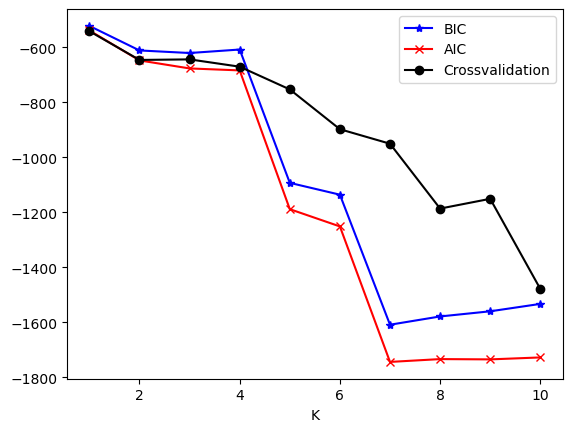

Ran Exercise 11.1.5


In [2]:
# exercise 11.1.5
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import model_selection
from sklearn.mixture import GaussianMixture

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth2.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Range of K's to try
KRange = range(1, 11)
T = len(KRange)

covar_type = "full"  # you can try out 'diag' as well
reps = 3  # number of fits with different initalizations, best result will be kept
init_procedure = "kmeans"  # 'kmeans' or 'random'

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10, shuffle=True)

for t, K in enumerate(KRange):
    print("Fitting model for K={0}".format(K))

    # Fit Gaussian mixture model
    gmm = GaussianMixture(
        n_components=K,
        covariance_type=covar_type,
        n_init=reps,
        init_params=init_procedure,
        tol=1e-6,
        reg_covar=1e-6,
    ).fit(X)

    # Get BIC and AIC
    BIC[t,] = gmm.bic(X)
    AIC[t,] = gmm.aic(X)

    # For each crossvalidation fold
    for train_index, test_index in CV.split(X):
        # extract training and test set for current CV fold
        X_train = X[train_index]
        X_test = X[test_index]

        # Fit Gaussian mixture model to X_train
        gmm = GaussianMixture(
            n_components=K, covariance_type=covar_type, n_init=reps
        ).fit(X_train)

        # compute negative log likelihood of X_test
        CVE[t] += -gmm.score_samples(X_test).sum()


# Plot results

plt.figure(1)
plt.plot(KRange, BIC, "-*b")
plt.plot(KRange, AIC, "-xr")
plt.plot(KRange, 2 * CVE, "-ok")
plt.legend(["BIC", "AIC", "Crossvalidation"])
plt.xlabel("K")
plt.show()

print("Ran Exercise 11.1.5")

## Density estimation

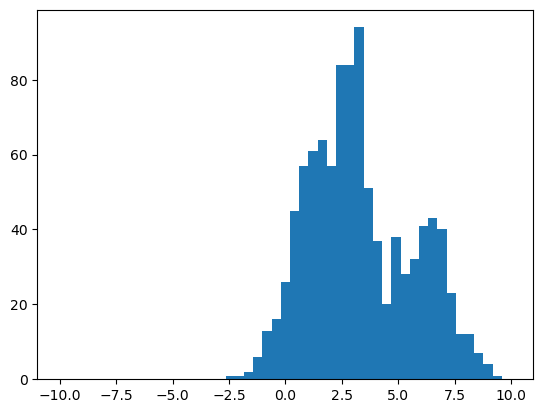

Ran Exercise 11.2.1


In [3]:
# exercise 11_2_1
import numpy as np
import matplotlib.pyplot as plt

# Number of data objects
N = 1000

# Number of attributes
M = 1

# x-values to evaluate the histogram
x = np.linspace(-10, 10, 50)

# Allocate variable for data
X = np.empty((N, M))

# Mean and covariances
m = np.array([1, 3, 6])
s = np.array([1, 0.5, 2])

# Draw samples from mixture of gaussians
c_sizes = np.random.multinomial(N, [1.0 / 3, 1.0 / 3, 1.0 / 3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id] - c_sizes[c_id] : c_sizes.cumsum()[c_id], :] = (
        np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size, M))
    )


# Plot histogram of sampled data
plt.figure()
plt.hist(X, x)
plt.show()

print("Ran Exercise 11.2.1")

/tmp/ipykernel_49128/1241516440.py:4: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.kde import gaussian_kde


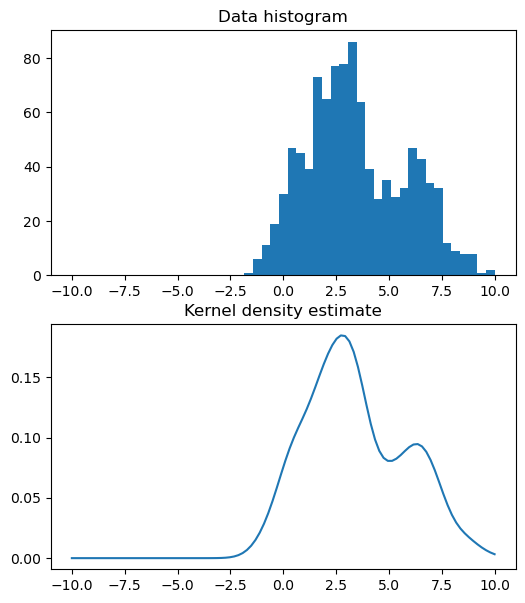

Ran Exercise 11.2.2


In [4]:
# exercise 11.2.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde

# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 1000
M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N, M))
m = np.array([1, 3, 6])
s = np.array([1, 0.5, 2])
c_sizes = np.random.multinomial(N, [1.0 / 3, 1.0 / 3, 1.0 / 3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id] - c_sizes[c_id] : c_sizes.cumsum()[c_id], :] = (
        np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size, M))
    )


# x-values to evaluate the KDE
xe = np.linspace(-10, 10, 100)

# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

# Plot kernel density estimate
plt.figure(figsize=(6, 7))
plt.subplot(2, 1, 1)
plt.hist(X, x)
plt.title("Data histogram")
plt.subplot(2, 1, 2)
plt.plot(xe, kde.evaluate(xe))
plt.title("Kernel density estimate")
plt.show()

print("Ran Exercise 11.2.2")

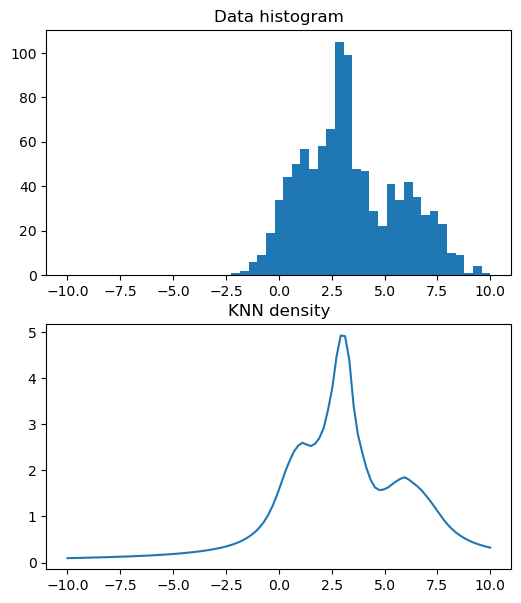

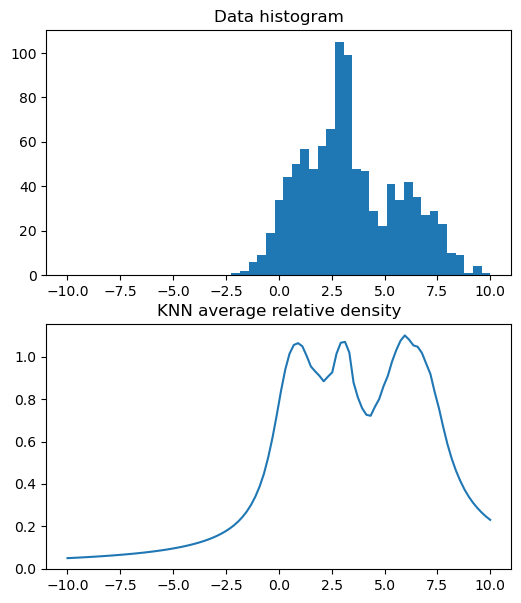

Ran Exercise 11.2.3


In [5]:
# exercise 11.2.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 1000
M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N, M))
m = np.array([1, 3, 6])
s = np.array([1, 0.5, 2])
c_sizes = np.random.multinomial(N, [1.0 / 3, 1.0 / 3, 1.0 / 3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id] - c_sizes[c_id] : c_sizes.cumsum()[c_id], :] = (
        np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size, M))
    )


# Number of neighbors
K = 200

# x-values to evaluate the KNN
xe = np.linspace(-10, 10, 100)

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(
    np.expand_dims(xe, axis=-1)
)  # note expand_dims is simple to make it (100,1) and not (100,) array

# Compute the density
knn_density = 1.0 / (D[:, 1:].sum(axis=1) / K)

# Compute the average relative density
DX, iX = knn.kneighbors(X)
knn_densityX = 1.0 / (DX[:, 1:].sum(axis=1) / K)
knn_avg_rel_density = knn_density / (knn_densityX[i[:, 1:]].sum(axis=1) / K)


# Plot KNN density
plt.figure(figsize=(6, 7))
plt.subplot(2, 1, 1)
plt.hist(X, x)
plt.title("Data histogram")
plt.subplot(2, 1, 2)
plt.plot(xe, knn_density)
plt.title("KNN density")

# Plot KNN average relative density
plt.figure(figsize=(6, 7))
plt.subplot(2, 1, 1)
plt.hist(X, x)
plt.title("Data histogram")
plt.subplot(2, 1, 2)
plt.plot(xe, knn_avg_rel_density)
plt.title("KNN average relative density")

plt.show()

print("Ran Exercise 11.2.3")

## Outlier detection
Hawkin’s Definition of an Outlier. An outlier is an observation that differs so much from other observations as to arouse suspicion that it was generated by a different mechanism.
Probabilistic Definition of an Outlier. An outlier is an object that has a low probability with respect to a probability distribution model of the data.

The index of the lowest density object: 999


/tmp/ipykernel_49128/3566999920.py:4: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.kde import gaussian_kde


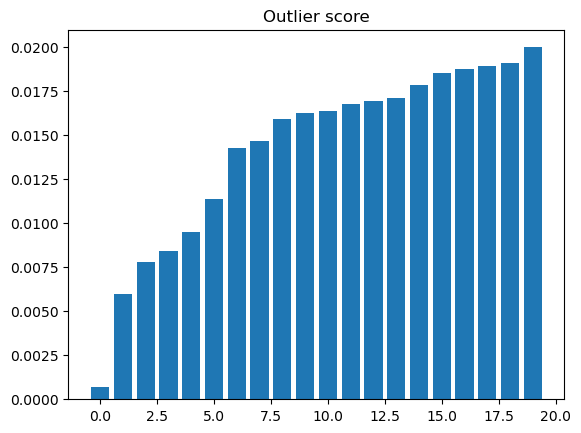

Ran Exercise 11.3.1


In [ ]:
# exercise 11.3.1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde

# Draw samples from mixture of gaussians (as in exercise 11.1.1), add outlier
N = 1000
M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N, M))
m = np.array([1, 3, 6])
s = np.array([1, 0.5, 2])
c_sizes = np.random.multinomial(N, [1.0 / 3, 1.0 / 3, 1.0 / 3])
# Similar to this
# start_idx = 0
# for c_id, c_size in enumerate(c_sizes):
#     X[start_idx : start_idx + c_size, :] = np.random.normal(
#         m[c_id], np.sqrt(s[c_id]), (c_size, M)
#     )
#     start_idx += c_size
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id] - c_sizes[c_id] : c_sizes.cumsum()[c_id], :] = (
        np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size, M))
    )
X[-1, 0] = -10  # added outlier


# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

scores = kde.evaluate(X.ravel())
idx = scores.argsort()
scores.sort()

print("The index of the lowest density object: {0}".format(idx[0]))

# Plot kernel density estimate
plt.figure()
plt.bar(range(20), scores[:20])
plt.title("Outlier score")
plt.show()

print("Ran Exercise 11.3.1")